# Group1_Diamond Price Prediction

# Problem Definition and Objectives

## Problem Definition
Predict diamond prices based on features like carat weight, cut, color, clarity, and dimensions using the `diamonds.csv` dataset.

## Objectives
1. **Data Exploration**:
   - Load and inspect the dataset.
   - Visualize correlations and distributions.

2. **Model Building**:
   - Preprocess data and encode categorical variables.
   - Train a Linear Regression model.

3. **Model Evaluation**:
   - Evaluate using MSE and R2.
   - Visualize actual vs. predicted prices.
   - Analyze residuals.

4. **Conclusions**:
   - Summarize key findings and insights.
   - Recommend potential improvements.

# Data Cleaning and Processing

In [198]:
# Import Libraries and Load Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [199]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Min value of X, Y, Z are zero, which mean there is dimensionless daimond, we will not this data. So, we will remove them.

In [200]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


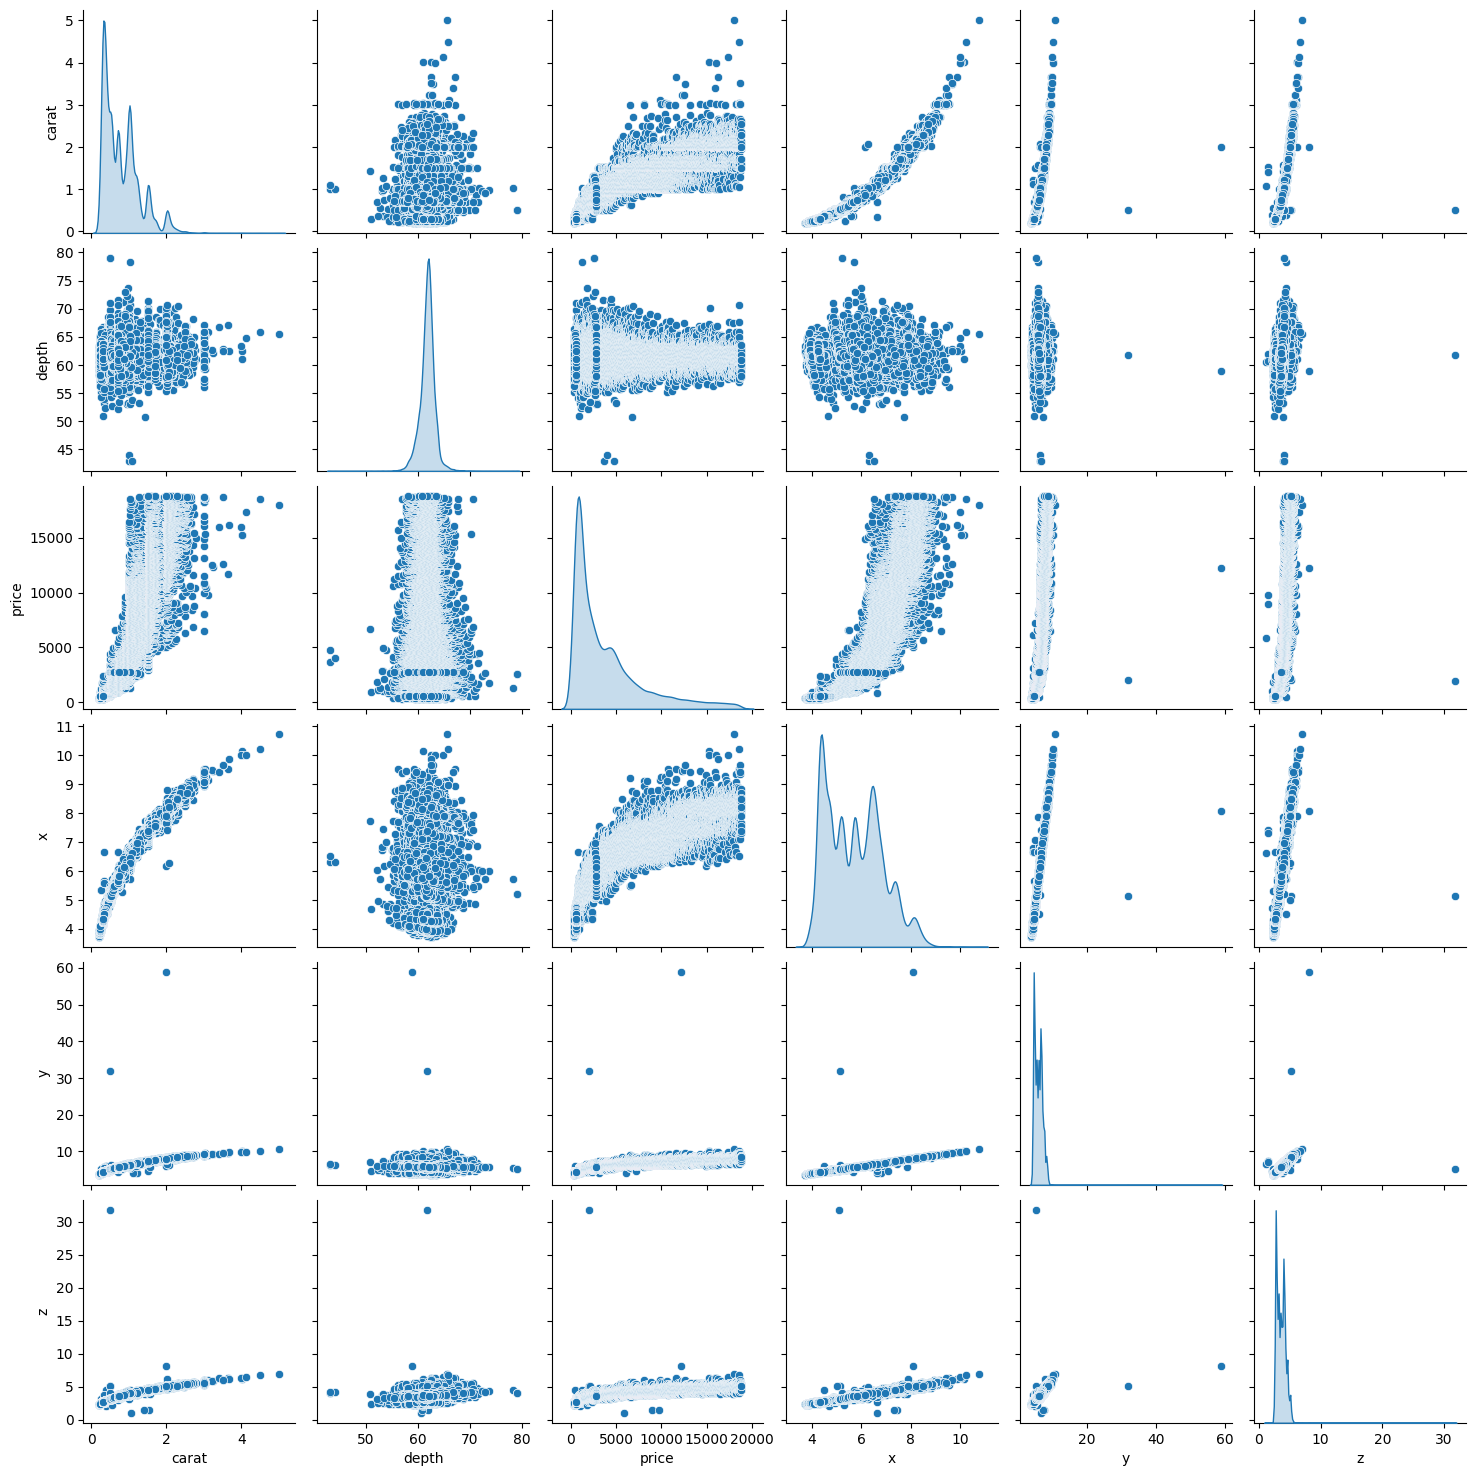

In [201]:
# Generate a pairplot
sns.pairplot(data[['carat', 'depth', 'price','x','y','z']], diag_kind="kde")
plt.show()

There are some points which are far away from the other data points which can be seen in the X, Y, Z and table with price.

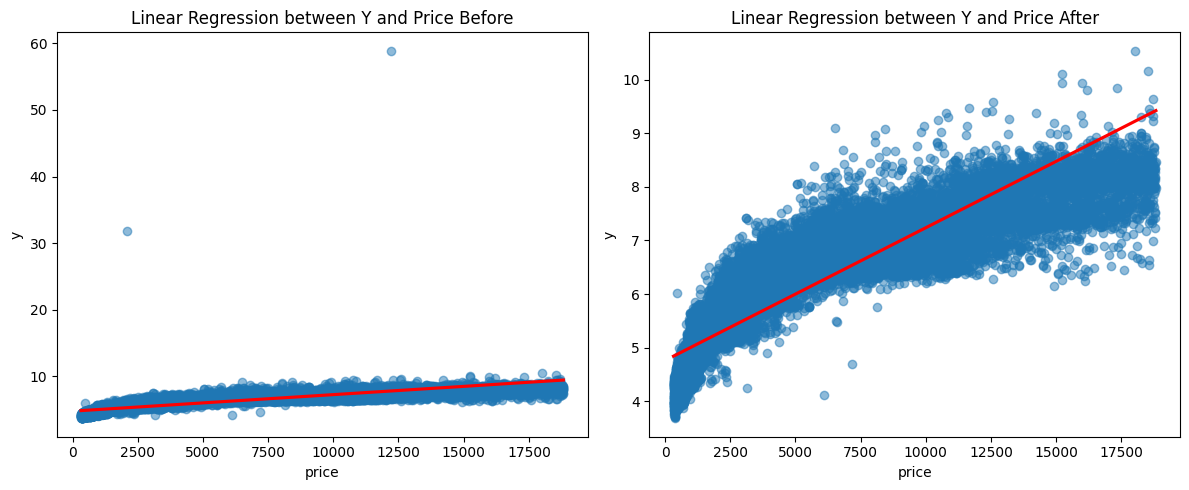

In [202]:
# Plot a linear regression line between 'price' and 'x'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x="price", y="y", data=data, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},ax=axes[0])
axes[0].set_title('Linear Regression between Y and Price Before')

data = data[(data["y"]<30)]
sns.regplot(x="price", y="y", data=data, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},ax=axes[1])
axes[1].set_title('Linear Regression between Y and Price After')

plt.tight_layout()
plt.show()

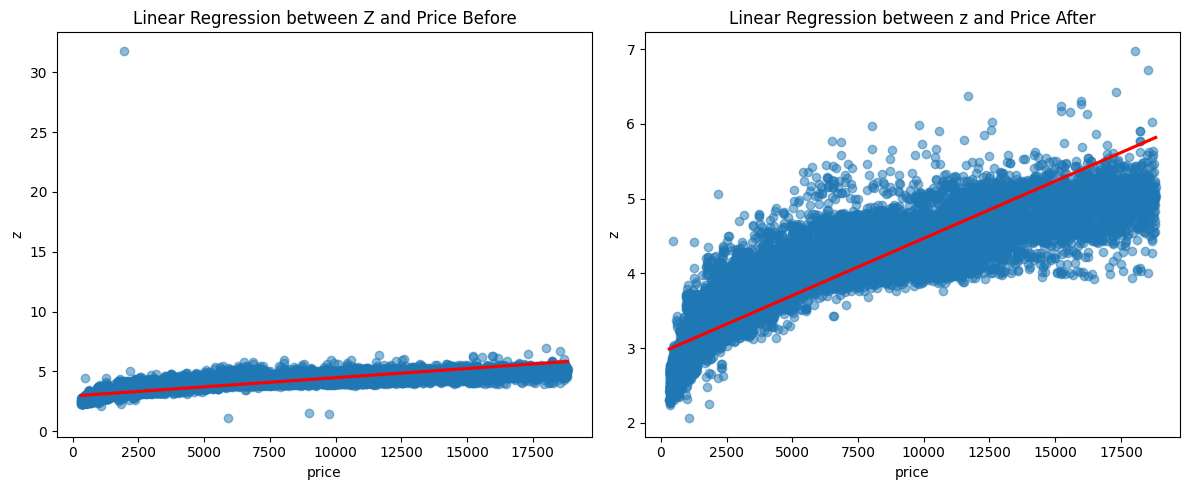

In [203]:
# Plot a linear regression line between 'price' and 'x'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x="price", y="z", data=data, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},ax=axes[0])
axes[0].set_title('Linear Regression between Z and Price Before')

data = data[(data["z"]<30) & (data["z"]>2)]
sns.regplot(x="price", y="z", data=data, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},ax=axes[1])
axes[1].set_title('Linear Regression between z and Price After')

plt.tight_layout()
plt.show()

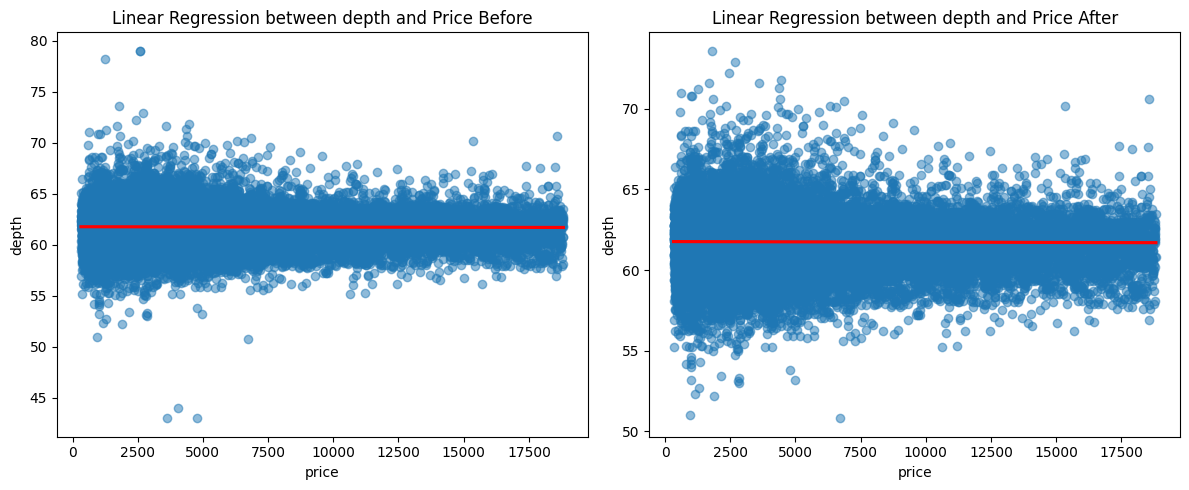

In [204]:
# Plot a linear regression line between 'price' and 'x'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x="price", y="depth", data=data, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},ax=axes[0])
axes[0].set_title('Linear Regression between depth and Price Before')

data = data[(data["depth"]<75) & (data["depth"]>50)]
sns.regplot(x="price", y="depth", data=data, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},ax=axes[1])
axes[1].set_title('Linear Regression between depth and Price After')
plt.tight_layout()
plt.show()

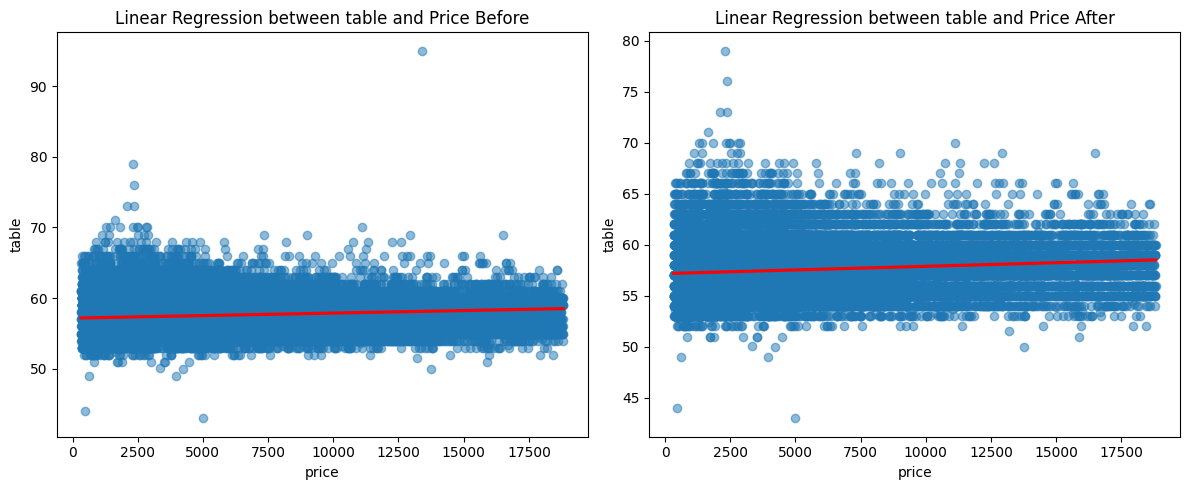

In [205]:
# Plot a linear regression line between 'price' and 'x'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x="price", y="table", data=data, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},ax=axes[0])
axes[0].set_title('Linear Regression between table and Price Before')

data = data[(data["table"]<80) & (data["table"]>40)]
sns.regplot(x="price", y="table", data=data, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},ax=axes[1])
axes[1].set_title('Linear Regression between table and Price After')
plt.tight_layout()
plt.show()

# Correlation Matrix and Distributions

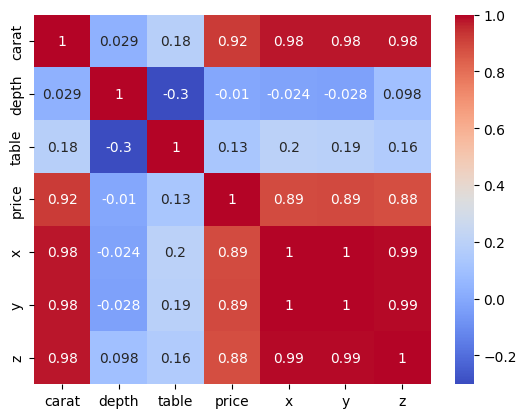

In [206]:
# Correlation Matrix and Distributions
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

Clearly X,Y,Z has the highest correlation with the Price and Carat.

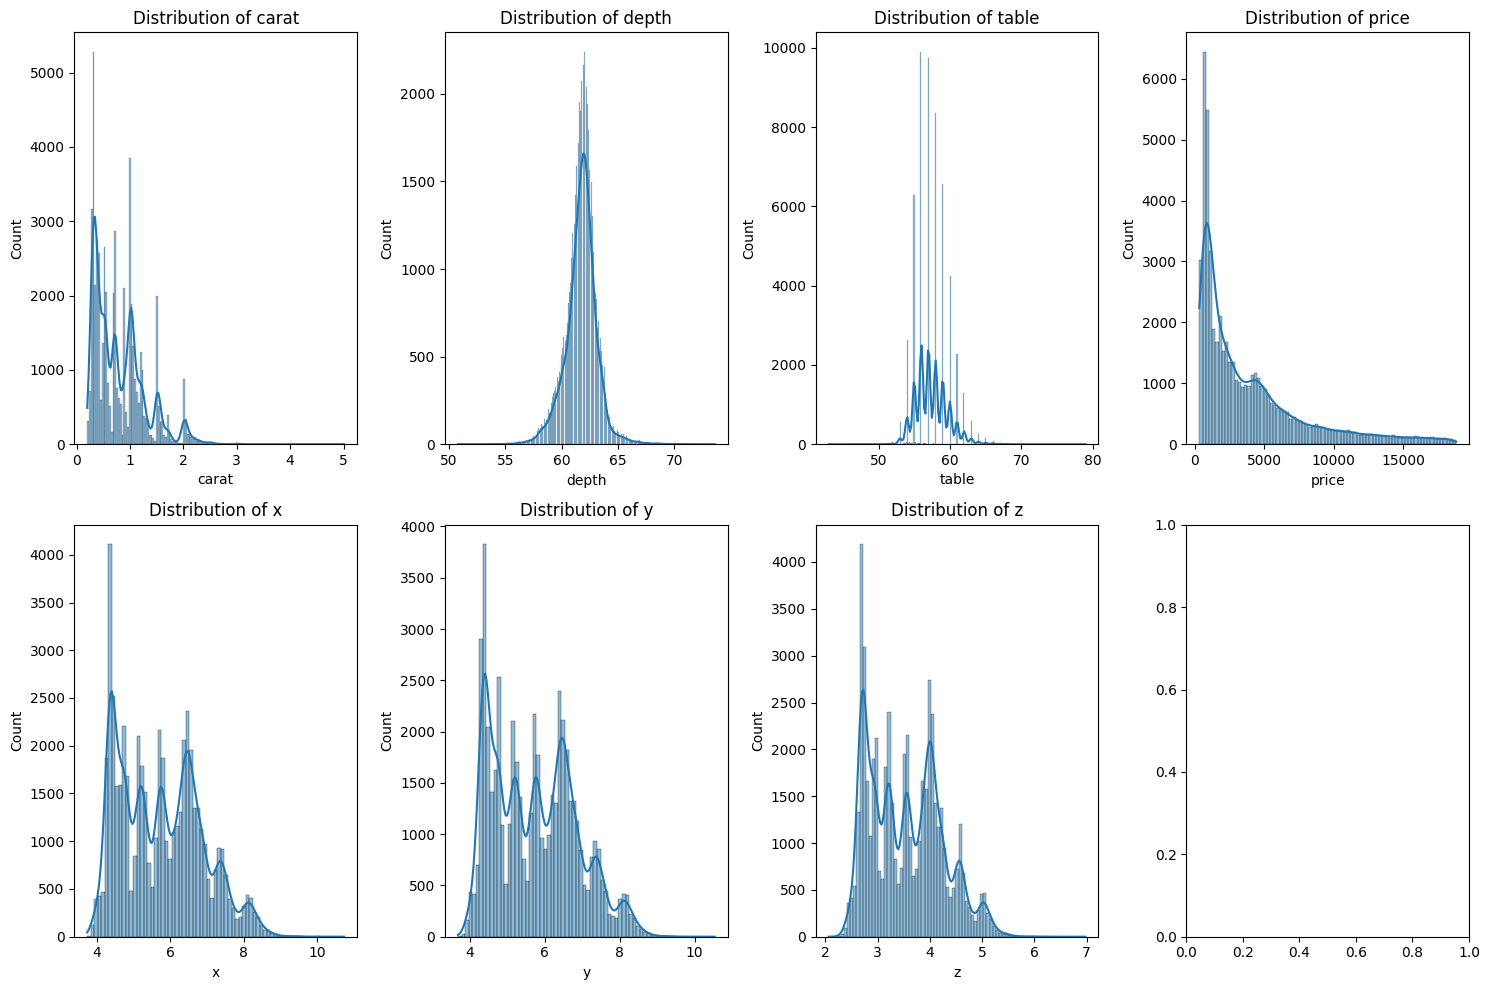

In [207]:
# Plot the distributions of the dataset columns
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()
i = 0
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    #plt.figure(figsize=(10, 6))
    sns.histplot(data[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    i+=1

plt.tight_layout()
plt.show()

# Regression Model

In [208]:
# Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)
data.head()


,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,True,False,False,...,False,True,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [209]:

X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numeric variables
    ('regressor', LinearRegression()) 
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

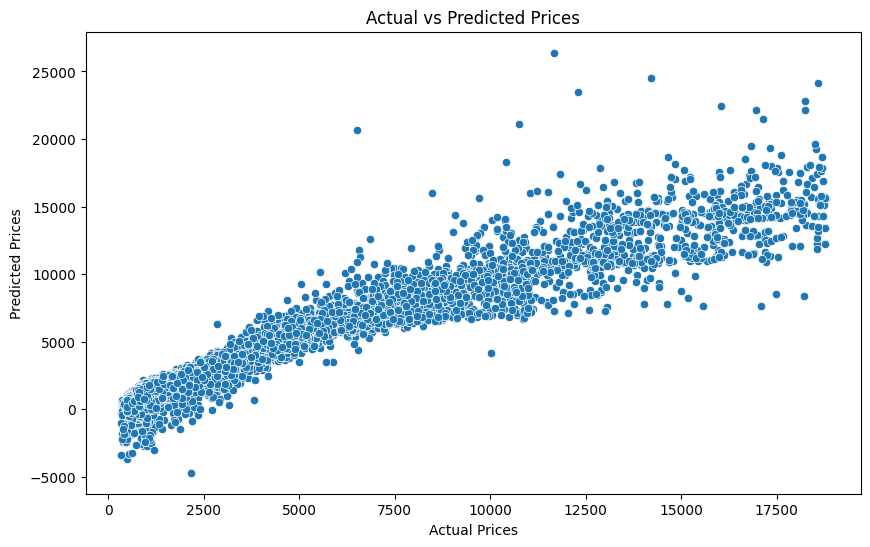

In [210]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Model Evaluation

In [211]:
# Model Evaluation
print("R^2:",r2_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))
print("RMSE:",root_mean_squared_error(y_test, y_pred))

R^2: 0.9190581009746508
MAE: 725.1909038606531
MSE: 1229321.3938064969
RMSE: 1108.747669132385


# Residual Distribution

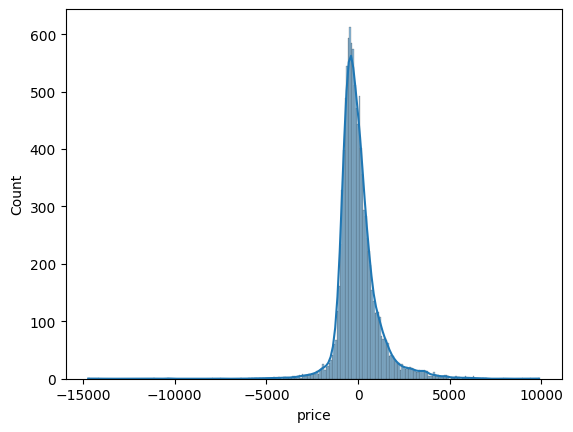

In [212]:
# Residual Distribution
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.show()

# Conclusions

* Carat weight is the most significant predictor of price.
* Linear regression captured most of the variance in price.
* Outliers in diamond dimensions slightly affected the model's accuracy.
* Residuals showed a near-normal distribution, indicating a good model fit.
* Improved preprocessing (like scaling) may enhance predictions.